---

# Análise de risco para detectar as possíveis razões para a adimplência e inadimplência financeira de clientes que usam cartões de crédito

- A análise de risco visa identificar os principais fatores que influenciam a adimplência e inadimplência financeira de clientes que utilizam cartões de crédito. Este estudo busca compreender as razões por trás dos pagamentos pontuais e atrasados, avaliando aspectos como comportamento de gastos, histórico de pagamentos, perfil de renda, entre outros. Ao entender esses padrões, é possível tomar decisões mais informadas sobre a concessão de crédito, mitigando riscos e promovendo uma gestão mais eficiente dos recursos financeiros.

## 1\. Exploração de Dados

- Toda a análise será realizada a partir de uma planilha que foi disponibilizada. Ela oferece uma vasta quantidade de dados de vários clientes de um determinado banco que libera crédito aos seus clientes. Abaixo, há uma tabela que descreve os títulos de cada coluna da planilha a ser analisada.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



- Para começar, será utilizado o pacote pandas para a leitura desses dados em um dataframe.

In [ ]:
import pandas as pd

- Agora será realizada a importação dos dados. Nessa etapa, é muito importante que os dados vazios sejam representados por um parâmetro, como mostrado na definição do dataframe. Nesse caso, foi usado o na_values='na' para representar os dados faltantes. Isso é muito importante para as etapas seguintes, pois permite uma visualização numérica de quantos dados estão faltando e quais são esses dados. Sem essa definição, é mais difícil obter essa representação.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/planilha.csv', na_values='na')

- Para verificar se está tudo certo com a importação dos dados será feita a leitura das dez primeiras linhas desse dataframe. '




In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


- Repare que na coluna 'default' só temos  o 0 (zero) como valor atribuido. Nesse caso, o zero significa que o cliente é adimplente, enquanto os inadimplentes são representados pelo valor 1 (um). É a partir desses dados que toda a análise será baseada.
Com os dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

### **1.1. Estrutura**

Aqui será feita a apuração de quantas linhas e colunas, respectivamente, há em nosso dataframe.

- Apuração total de linhas e colunas

In [ ]:
df.shape

(10127, 16)

- Apuração do número de adimplentes

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

- Apuração do numero de inadimplentes

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

- Parametrização da quantidade total de linhas e colunas do dataframe. E da quantidade de adimplentes e inadimplentes para verificar a proporção entre eles.

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Com essa proporção, concluimos que nossa base de dados é desbalanceada. Pois em nossa coluna de interesse, o default, há uma quantidade muito maior de adimplentes do que de adimplente. O que, em geral, é verdade para as instituições financeiras.

### **1.2. Schema**

 - Aqui será analisado como esse dados estão representados em cada coluna do dataframe. Como, por exemplo, se é um número inteiro, um float ou um objeto.


In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Observa-se que há duas incongruências na tipagem dos nossos dados, pois existem tipos de dados esperados para cada categoria. Por exemplo, na idade é esperado um número inteiro, enquanto na escolaridade é esperado um objeto (que nada mais é do que uma string). Entretanto, para as colunas 'limite_credito' e 'valor_transacoes_12m', é esperado um tipo float, e não um objeto, como está descrito na verificação que fizemos. Isso ocorreu devido à forma como os números estão representados. Foi usada uma representação brasileira para números, com um "." para a separação do milhar e a "," para a separação dos números fracionados, como por exemplo "10.599,97". Dessa forma, o Python não reconhece essa representação como um número; apenas a representação inglesa é reconhecida, que não utiliza "." para a separação do milhar, mas sim para separar a parte fracionada do número, como por exemplo "10599.97". Portanto, é necessário fazer essas modificações no dataframe, transformando essas colunas incongruentes do tipo objeto para tipo float. Caso contrário, a análise com os dados dessas colunas ficará inviável.

 - Extração apenas dos atributos **categóricos** (object).

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


A tabela fornecida é o resultado da função describe() aplicada a um DataFrame após selecionar apenas colunas do tipo objeto (strings). Aqui está o significado de cada coluna na tabela:

count: Representa o número de valores válidos não nulos para cada coluna.

unique: Indica o número de valores únicos encontrados em cada coluna.

top: É o valor mais frequente (moda) em cada coluna.

freq: Representa a frequência do valor mais comum (top) em cada coluna, ou
seja, quantas vezes ele aparece.

Observa-se nessa tabela um outro problema na base de dados. Como visto anteriormente, há 10127 linhas em nosso dataframe. Porém existem colunas de dados que não possuem essa quantidade de linhas, como, por exemplo, a "escolaridade", o "estado_civil" e o "salario_anual". Isso ocorreu devido a problemas no momento de transcrever os dados para a tabela. Isso pode ter ocorrido por diversos motivos, seja por desatenção de quem preencheu a tabela ou até mesmo por falta de fornecimento desses dados em específico. Sendo assim é necessário verificar se essa quantidade faltante nessas colunas de dados afetarão significativamente em nossa análise de dados de adimplência e inadimplência.

 - Extração apenas dos atributos **numéricos** (int e float).

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


A tabela fornecida é o resultado da função describe() aplicada a um DataFrame após remover a coluna 'id' e selecionar apenas colunas do tipo numérico. Aqui está o significado de cada coluna na tabela:

count: Representa o número de valores válidos não nulos para cada coluna.

mean: Indica a média dos valores para cada coluna.

std: É o desvio padrão dos valores para cada coluna, uma medida de dispersão em relação à média.

min: Representa o menor valor encontrado em cada coluna.

25% (percentil 25): É o valor abaixo do qual 25% dos dados estão para cada coluna, também conhecido como primeiro quartil.

50% (percentil 50): Corresponde à mediana dos valores para cada coluna, onde metade dos dados estão acima e metade abaixo deste valor.

75% (percentil 75): É o valor abaixo do qual 75% dos dados estão para cada coluna, também conhecido como terceiro quartil.

max: Representa o maior valor encontrado em cada coluna.

A partir dessas estatísticas descritivas, você pode ter uma ideia geral da distribuição e das características dos dados em cada coluna do DataFrame. Por exemplo, a coluna 'default' parece ser uma variável binária (0 ou 1), enquanto a coluna 'idade' representa a idade dos clientes, e assim por diante para as demais colunas mencionadas na tabela.







### **1.3. Dados faltantes**

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

- Como mencinado acima, existem colunas com dados faltantes. Podemos verificar quais colunas possuem dados faltantes através do código abaixo.

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Onde obtvemos o booleano "true" é porque há dados faltantes na coluna. E onde se obteve o booleano "false! é porque não há dados faltantes na coluna.

 - Com as informações obtidas, será verificado alguns dados estátisticos a respeito dessas colunas com valores faltantes através da função abaixo.

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    # Inicializa uma lista vazia para armazenar as estatísticas de dados faltantes
    stats_dados_faltantes = []

    # Loop sobre as colunas do DataFrame
    for col in df.columns:
        # Verifica se há valores faltantes ('na') na coluna atual
        if df[col].isna().any():
            # Calcula a quantidade de valores faltantes na coluna
            qtd, _ = df[df[col].isna()].shape
            # Obtém o número total de linhas no DataFrame
            total, _ = df.shape
            # Calcula a porcentagem de valores faltantes em relação ao total de linhas
            porcentagem = round(100 * qtd / total, 2)
            # Cria um dicionário com as estatísticas de dados faltantes para a coluna atual
            dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': porcentagem}}
            # Adiciona o dicionário de estatísticas à lista de estatísticas de dados faltantes
            stats_dados_faltantes.append(dict_dados_faltantes)

    # Loop sobre as estatísticas de dados faltantes e imprime cada uma
    for stat in stats_dados_faltantes:
        print(stat)

- executando a função stats_dados_faltantes para analisar e imprimir estatísticas de valores faltantes no DataFrame df.

In [ ]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


- Filtrando o dataFrame para incluir apenas as linhas onde a coluna 'default' tem o valor igual a 0 (adimplente)

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


- Filtrando o dataFrame para incluir apenas as linhas onde a coluna 'default' tem o valor igual a 1 (inadimplente)

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Pode-se observar que a porcentagem de dados faltantes nos três critérios observados acima está bem próxima. A proximidade das porcentagens de valores faltantes entre os diferentes grupos é um reflexo da consistência na distribuição de valores faltantes nas colunas ao longo dos diferentes grupos de dados. Isso significa que podemos prosseguir eliminando essas linhas com dados faltantes sem qualquer prejuízo em nossa análise.

Obs: Lembre-se de que no começo foi dito que é importante parametrizar os dados faltantes no momento em que se realiza a importação dos dados. Isso é necessário para determinar a quantidade de dados faltantes em nosso dataframe. Sem essa parametrização, não seria possível ter a visualização dessa análise através dos códigos utilizados acima.

## 2\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, será conduzido uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **2.1. Correção de schema**

- Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`). Como mostrado no código abaixo:

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

- Pra vizualizar melhor o problema, foi filtrado todo o dataframe para mostrar as cinco primeiras linhas apenas dos "limite_credito" e do "valor_tansacoes_12m".

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Note como os números estão representados conforma a norma brasileira e não inglesa. Isso faz com que o python não reconheça esses dados como um numero, mais epecíficamente, como um float.

- Será criado uma função `lambda` para limpar e converter os dados de interesse. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


A conversão foi realizada com sucesso, com isso é só aplica-la no dataframe.

Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora os atributos "valor_transacoes_12m" e "limite_credito" estão com suas tipagens corretas, como esperado anteriormente. Com isso podemos prosseguir com uma possível análise de dados utilizando essas colunas.

- Nova extração apenas dos atributos categóricos (object).

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Nova extração apenas dos atributos **numéricos** (int e float).

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Obeserva-se que os atributos "valor_transacoes_12m" e "limite_credito" agora são numericos e não mais categóricos como antes.

### **2.2. Remoção de dados faltantes**

- Como ja menicionado, podemos eliminar as linhas com dados faltantes sem prejuízos na analise. Para isso, ao aplicar o método dropna() com o parâmetro inplace=True no DataFrame df, remove-se todas as linhas que continham valores faltantes em qualquer coluna do DataFrame. Isso é útil se você deseja trabalhar apenas com dados completos e não precisa mais das linhas que possuem valores faltantes.

In [ ]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

- Refazendo a leitura do dataframe a da coluna de interesse, como feito no capitulo 1.1.

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
df[df['default'] == 1].shape

(1113, 16)

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Constata-se novamente a consistência da base de dados, mesmo eliminando as linhas com valores faltantes. Isso ocorre devido a pouca variação da porcentegem dos atributos que foram reanalisados em relação aos que foram feitos no capítulo 1.1.

## 3\. Visualização de dados

Com os dados prontos, será criado diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

- Começa importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

- Criação de um novo DataFrame chamado df_adimplente que contém apenas as linhas do DataFrame original df onde a coluna 'default' é igual a 0.

In [ ]:
df_adimplente = df[df['default'] == 0]

 Criação de um novo DataFrame chamado df_inadimplente que contém apenas as linhas do DataFrame original df onde a coluna 'default' é igual a 1.

In [ ]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos (strings).

In [ ]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


 - A começar pelo nivel de Escolaridade do clientes, conforme o código abaixo.


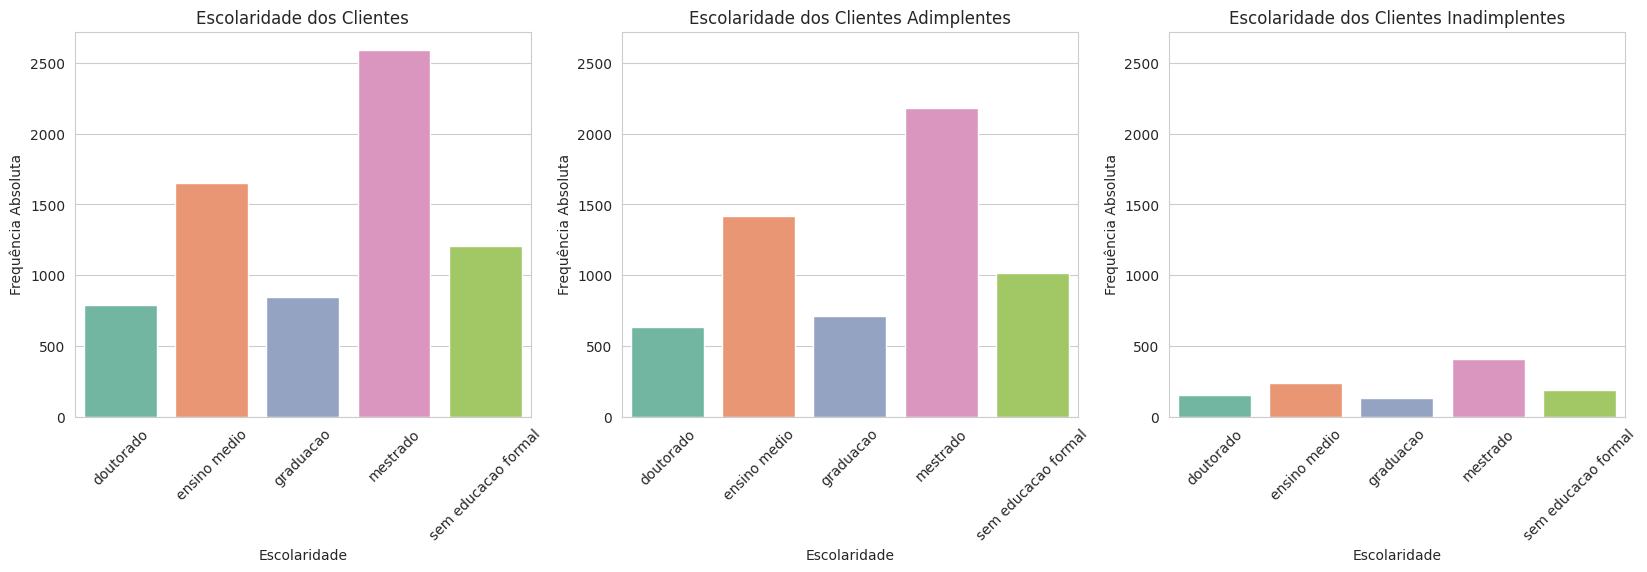

In [ ]:
# Define a coluna que será analisada
coluna = 'escolaridade'

# Títulos para os gráficos em cada eixo
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

# Definindo uma paleta de cores personalizada com cores diferentes para cada barra
cores = sns.color_palette('Set2', n_colors=len(df[coluna].unique()))
# Inicializando variáveis para controle dos eixos e da altura máxima do gráfico
eixo = 0
max_y = 0

# Criando a figura com 3 eixos (subplots) lado a lado
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# Loop sobre os DataFrames de cada tipo de cliente: total, adimplente e inadimplente
for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    # Criando o DataFrame com a contagem de ocorrências de cada categoria na coluna 'salario_anual'
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)

    # Criando o gráfico de barras para o DataFrame atual no eixo correspondente, usando a paleta de cores personalizada
    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo], hue=coluna, palette=cores, legend=False)
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Configurando os rótulos do eixo x com a localização fixa e rotação de 90 graus
    xticks = range(0, len(df_to_plot[coluna]), 1)  # Usando o número de categorias como localizações fixas
    f.set_xticks(xticks)
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=45)

    # Obtendo a altura máxima atual do gráfico no eixo y e atualizando se necessário
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

# Definindo a altura máxima do gráfico em todos os eixos para garantir consistência
for eixo in eixos:
    eixo.set(ylim=(0, max_y))

# Exibindo a figura com os gráficos
plt.show()


A partir deste conjunto de dados mostrado nos gráficos, pode-se identificar algumas coisas. Primeiro, a distribuição da escolaridade dos clientes. É notável que a base de clientes é majoritariamente composta por quem tem algum nível de educação superior, principalmente mestrado. Entretanto, também há uma grande frequência de quem tem apenas ensino médio ou não possui algum tipo de educação formal. Outra coisa a se observar é a proporção dos atributos de escolaridade em cada gráfico. É notável como elas mantêm proporções muito próximas em todos os atributos observados, com uma pequena diferença apenas nos gráficos de inadimplentes, em que a frequência do atributo "doutorado" é um pouco superior ao atributo "graduação", o que não é verdade nos dois primeiros gráficos. Porém, por se tratar de uma diferença sutil e de todos os outros atributos manterem a proporção nos três gráficos, a conclusão é que a escolaridade não é determinante para definir se uma pessoa terá uma tendência maior a ser inadimplente ou não.

 - Salário Anual

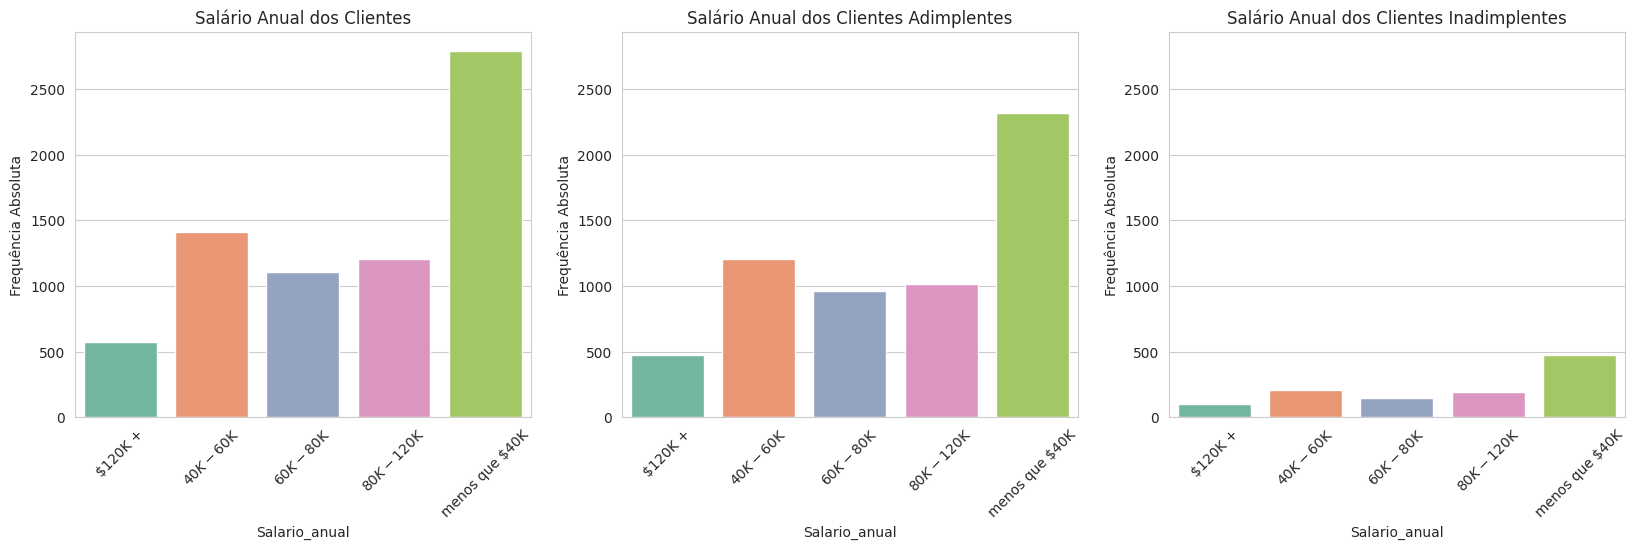

In [ ]:
# Definindo as colunas e os títulos para os gráficos
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

# Definindo uma paleta de cores personalizada com cores diferentes para cada barra
cores = sns.color_palette('Set2', n_colors=len(df[coluna].unique()))
# Inicializando variáveis para controle dos eixos e da altura máxima do gráfico
eixo = 0
max_y = 0

# Criando a figura com 3 eixos (subplots) lado a lado
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# Loop sobre os DataFrames de cada tipo de cliente: total, adimplente e inadimplente
for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    # Criando o DataFrame com a contagem de ocorrências de cada categoria na coluna 'salario_anual'
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)

    # Criando o gráfico de barras para o DataFrame atual no eixo correspondente, usando a paleta de cores personalizada
    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo], hue=coluna, palette=cores, legend=False)
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Configurando os rótulos do eixo x com a localização fixa e rotação de 90 graus
    xticks = range(0, len(df_to_plot[coluna]), 1)  # Usando o número de categorias como localizações fixas
    f.set_xticks(xticks)
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=45)

    # Obtendo a altura máxima atual do gráfico no eixo y e atualizando se necessário
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

# Definindo a altura máxima do gráfico em todos os eixos para garantir consistência
for eixo in eixos:
    eixo.set(ylim=(0, max_y))

# Exibindo a figura com os gráficos
plt.show()


Nesse conjunto de dados, podemos tirar conclusões parecidas com as do conjunto anterior. A maioria dos clientes dessa instituição financeira é composta por pessoas que têm uma renda menor que 40k ao ano. Há uma frequência muito próxima entre aqueles que têm os atributos de 40k-60k, 60k-80k e 80k-120k, e uma frequência menor para aqueles que ganham mais de 120k anualmente. Nota-se que as proporções desses atributos ainda se mantêm parecidas em todos os gráficos, sem qualquer tipo de alteração das proporções em cada atributo entre os três gráficos. Pode-se concluir, então, que o salário anual não é um fator determinante para concluir se uma pessoa terá ou não uma tendência maior em ser inadimplente.

### **4.2. Visualizações numéricas**

Agora vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos. Mais epecíficamentes os atributos "limite_credito", "qtd_transacao_12m" e "valor_tansacoes_12m".

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


- Limite de crédito

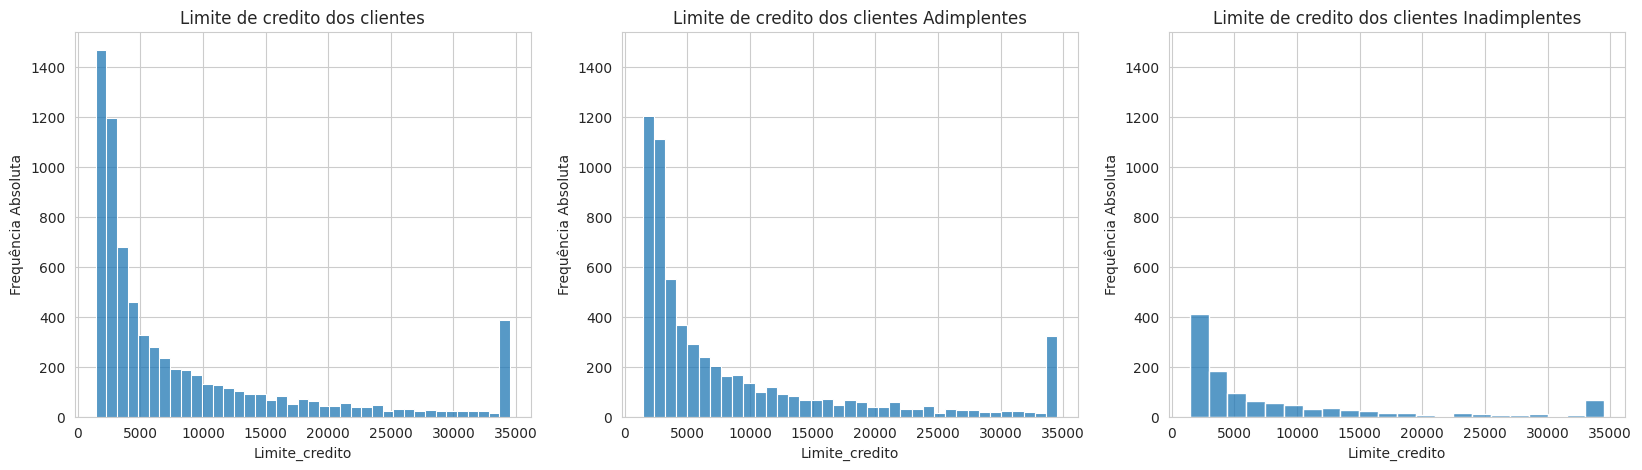

In [ ]:
# Define a coluna que será analisada
coluna = 'limite_credito'

# Títulos para os gráficos em cada eixo
titulos = ['Limite de credito dos clientes', 'Limite de credito dos clientes Adimplentes', 'Limite de credito dos clientes Inadimplentes']

# Inicializa variáveis para controle dos eixos e da altura máxima do gráfico
eixo = 0
max_y = 0

# Cria uma figura com 3 eixos (subplots) lado a lado, cada um representando um tipo de cliente
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# Loop sobre os DataFrames de cada tipo de cliente: total, adimplente e inadimplente
for dataframe in [df, df_adimplente, df_inadimplente]:
    # Cria o gráfico de histograma para a coluna 'qtd_transacoes_12m' no DataFrame atual
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    # Define título, rótulos dos eixos
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Obtém a altura máxima atual do gráfico no eixo y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y  # Atualiza a altura máxima se necessário
    # Define a altura máxima do gráfico para garantir consistência entre os subplots
    f.set(ylim=(0, max_y))

    # Atualiza o índice do eixo para o próximo subplot
    eixo += 1

# Exibe a figura com os gráficos
figura.show()


É interessante notar essa distribuição no limite de crédito entre os clientes da instituição financeira. Pode-se inferir que, com base nos dados apresentados nos três gráficos e na análise realizada, o limite de crédito por si só não parece ser um fator decisivo para determinar se um cliente terá uma maior tendência a ser inadimplente ou não. Isso sugere que outros atributos ou variáveis podem estar mais relacionados à inadimplência dos clientes, e pode ser útil explorar essas relações em análises futuras para obter insights mais precisos sobre os fatores que influenciam o comportamento de pagamento dos clientes.







 - Quantidade de Transações nos Últimos 12 Meses

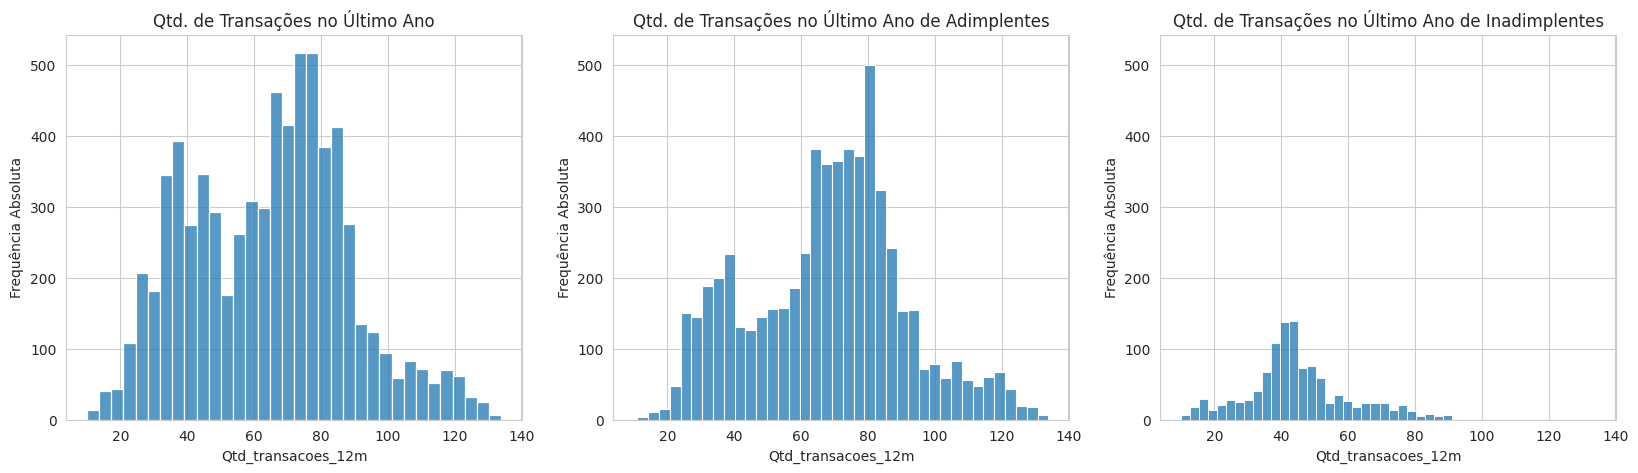

In [ ]:
# Define a coluna que será analisada
coluna = 'qtd_transacoes_12m'

# Títulos para os gráficos em cada eixo
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

# Inicializa variáveis para controle dos eixos e da altura máxima do gráfico
eixo = 0
max_y = 0

# Cria uma figura com 3 eixos (subplots) lado a lado, cada um representando um tipo de cliente
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# Loop sobre os DataFrames de cada tipo de cliente: total, adimplente e inadimplente
for dataframe in [df, df_adimplente, df_inadimplente]:
    # Cria o gráfico de histograma para a coluna 'qtd_transacoes_12m' no DataFrame atual
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    # Define título, rótulos dos eixos
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Obtém a altura máxima atual do gráfico no eixo y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y  # Atualiza a altura máxima se necessário
    # Define a altura máxima do gráfico para garantir consistência entre os subplots
    f.set(ylim=(0, max_y))

    # Atualiza o índice do eixo para o próximo subplot
    eixo += 1

# Exibe a figura com os gráficos
figura.show()


Aqui pode-se notar uma diferença visual significativa entre os três gráficos. Entre o primeiro (que é o total de clientes) e o segundo (que é de clientes adimplentes), essa diferença não é tão notável. Entretanto, ao compararmos o terceiro gráfico (clientes inadimplentes) com os dois primeiros, essa diferença já é notável. Daqui podemos tirar conclusões importantes para a análise dos dados. Por exemplo, no primeiro gráfico, há uma frequência bem grande entre quem faz entre 65 e 90 transações ao ano. Porém, a proporção dessa frequência não se repete no terceiro gráfico, que mostra que nessa faixa a frequência de inadimplência é uma das mais baixas. Ao contrário disso, observa-se que na faixa entre 30-50 transações ao ano, que também tem uma frequência alta, porém menor que a faixa entre 65-90 transações ao ano, o índice de inadimplência é o mais elevado. Ou seja, a proporção das faixas analisadas não se manteve nos 3 gráficos. Observa-se que quem faz cerca de 80 transações anuais é o que tem menos tendência a ser inadimplente, enquanto quem faz 35-45 transações tem uma tendência muito alta a ser inadimplente, sendo praticamente a mesma quantidade que a dos adimplentes nessa faixa, sendo até um pouco maior. Também é importante observar que a frequência de inadimplentes entre quem faz até 20 transações anuais é maior que a dos adimplentes.

Pode-se então concluir que a quantidade de transações anuais é um parâmetro relevante para prever se um cliente terá uma tendência maior para ser inadimplente.

 - Valor das Transações nos Últimos 12 Meses

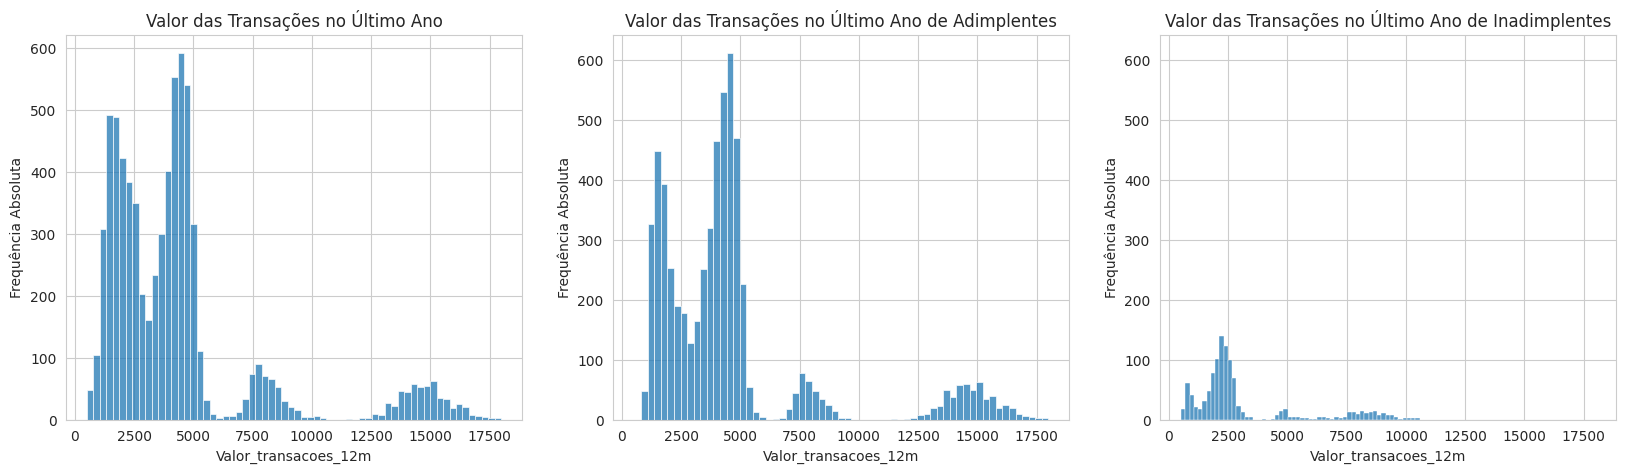

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui também se constata uma mudança de proporção entre os gráficos, principalmente entre valores próximos a 2500-3000 reais anuais e valores entre 1000-1500 reais aproximadamente. Nota-se que a frequência nessas faixas de valores de transações não é tão alta, comparada a outras no primeiro gráfico (total de clientes). Porém, elas representam as faixas com maiores frequências no terceiro gráfico (clientes inadimplentes). Observa-se também que a proporção de inadimplentes entre aqueles que realizam transações entre 3k-5k anuais é muito menor do que aqueles que realizam transações entre 6k-10k anuais. É importante observar que até mil reais no valor de transação anual, a quantidade de clientes adimplentes e inadimplentes é muito próxima. Dá para dizer que há uma chance de aproximadamente 50% do cliente ser inadimplente com um valor de transação de até mil reais anuais.

Dito isso, o valor de transação anual também é um fator determinante para prever se um cliente terá uma tendência maior a ser inadimplente ou não.

 - Para ter uma visualização melhor da distribuição entre clientes adimplentes e inadimplentes será feito um gráfico de dispersão entre o Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

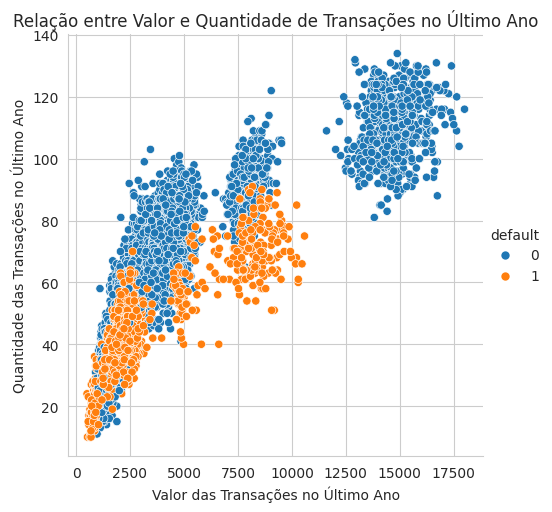

In [ ]:
# Cria o gráfico de dispersão com relação entre 'valor_transacoes_12m' no eixo x e 'qtd_transacoes_12m' no eixo y
# A terceira dimensão é representada pela cor (hue) com base na variável 'default'
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')

# Define o título, rótulos dos eixos x e y do gráfico
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)


O gráfico tem uma limitação visual, pois sabemos que o número de adimplentes é bem maior que o de inadimplentes. Entretanto, não dá para ter essa conclusão através desse gráfico, pois as bolinhas dispersas têm o mesmo tamanho e a cor laranja tem maior destaque que o azul no gráfico. Como uma bolinha fica sobreposta à outra, não é possível ter a real dimensão da proporção entre clientes inadimplentes e adimplentes. No entanto, ainda podemos tirar algumas conclusões e reforçar as que já foram tiradas nos últimos dois conjuntos de gráficos, como reconhecer quais são as zonas mais seguras e as que têm maior risco para a liberação de crédito.

É notável como as bolinhas laranjas estão mais concentradas na região do gráfico onde há menores quantidades de transações anuais e menores valores de transações anuais; podemos chamar isso de zona de risco alto. Também há uma quantidade considerável de inadimplentes entre quem faz entre 50-90 transações anuais, que é a faixa com uma das maiores frequências nesse atributo, e quem faz um valor de transação entre 6k-10k anuais, que é uma faixa com uma proporção não tão alta de adimplentes. Essa também é uma zona de risco.

Esse gráfico nos dá uma visualização muito boa das regiões em que não há inadimplentes, que são aquelas regiões que não têm interferência das bolinhas laranjas. Essas regiões podemos chamar de zonas seguras, como por exemplo, clientes que fazem altíssimos valores de transações, 12k pra cima, e quem faz entre 80-100 transações anuais com valores anuais entre 2,5k-5k.

É interessante notar no gráfico que existem um grupo de clientes que são praticamente 100% seguros de que irão ser adimplentes. Esses são os que fazem transações anuais superiores a R$11000,00, independente da quantidade de transações anuais.

- Tendo isso em mente, deseja-se descobrir qual é a porcentagem de pessoas que entram em alguma margem de risco, ou seja, que fazem transações menores que R$11000,00 anuais. Para isso foi elaborado o código abaixo.

In [ ]:
# Calcula o total de pessoas que realizam entre 0 e 10000 em transações anuais
total_transacoes = df.query('0 <= valor_transacoes_12m <= 11000').shape[0]

# Calcula a porcentagem em relação ao total de pessoas no DataFrame
porcentagem = (total_transacoes / df.shape[0]) * 100

# Exibe a porcentagem
print(f"Porcentagem de pessoas que realizam entre 0 e 11000 em transações anuais: {porcentagem:.2f}%")


Porcentagem de pessoas que realizam entre 0 e 11000 em transações anuais: 92.35%


Ou seja, 92.35% dos clientes, estão inseridos em alguma margem de risco quando se trata apenas de valor de transação anual.

- Em posse dessa informação, é interessante fazer o mesmo gráfico de dispersão anterior limitando o eixo do "valor_transacoes_anuais" limitado para até R$11000,00. E, alem disso, será aplicado uma reta de regressão linear para possibilitar uma outra perspectiva de avaliação do gráfico.

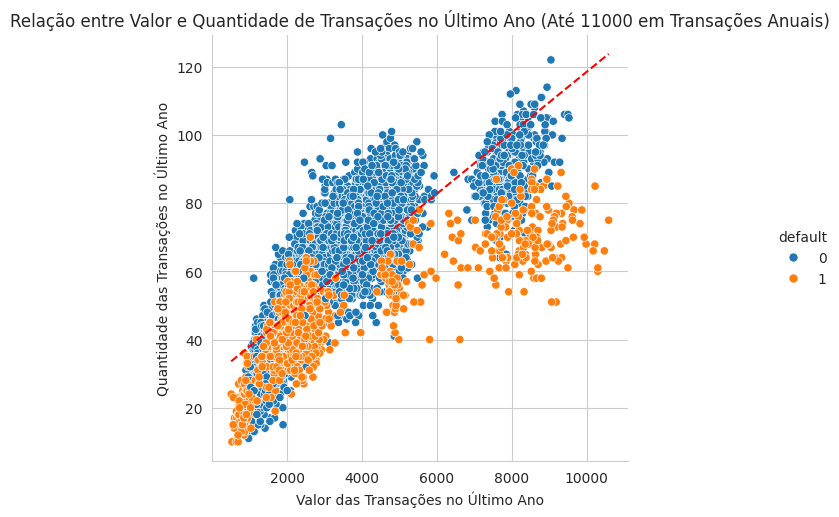

In [ ]:
import numpy as np
from scipy.stats import linregress

# Filtra os dados para pessoas que realizam até 11000 em transações anuais
filtered_df = df[df['valor_transacoes_12m'] <= 11000]

# Cria o gráfico de dispersão com relação entre 'valor_transacoes_12m' no eixo x e 'qtd_transacoes_12m' no eixo y
# A terceira dimensão é representada pela cor (hue) com base na variável 'default'
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=filtered_df, hue='default')

# Define o título, rótulos dos eixos x e y do gráfico
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano (Até 11000 em Transações Anuais)',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

# Adiciona a regressão linear ao gráfico de dispersão
slope, intercept, _, _, _ = linregress(filtered_df['valor_transacoes_12m'], filtered_df['qtd_transacoes_12m'])
x_values = np.linspace(filtered_df['valor_transacoes_12m'].min(), filtered_df['valor_transacoes_12m'].max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='--')

# Mostra o gráfico com a regressão linear limitada a pessoas que realizam até 11000 em transações anuais
plt.show()


Aqui está o gráfico que engloba apenas os clientes que possuem algum risco de ser inadimplente.

A reta da regressão linear nos dá uma clara percepção de onde estão os grupos de maiores e menores riscos de serem inadimplentes. Constata-se que tudo que está acima da reta se trata de uma zona segura para a liberação de crédito, pois existe pouca concentração de inadimplentes. Enquanto abaixo dessa linha existe uma concentração muito maior de inadimplentes. Portanto, podemos considerar que essa é uma zona de maior risco.

Esse gráfico nos faz entender também que, a partir de uma determinada quantidade de transações anuais (mais ou menos 35), o valor da quantidade de transações deve crescer proporcionalmente em relação ao aumento dos valores de transações anuais. Caso contrário, trata-se de um cliente que apresenta um grande risco de ser inadimplente.

O gráfico oferece uma boa macro análise na relação entre as adimplências dos clientes. No entanto, assim como o anterior, o gráfico não nos permite quantificar os inadimplentes percentuais em determinadas faixas de comparação. Por exemplo, mesmo estando acima da linha da regressão linear, existe uma quantidade considerável de inadimplentes que realizam entre 40 e 60 transações anuais, com valores entre 1500 e 3000 reais nessas transações. Da mesma forma, existe uma pequena zona segura entre os clientes que fazem entre 90 e 110 transações anuais, com valores entre 7000 e 10000 reais anuais.

- Para poder quantificar a porcentagem de inadimplentes e adimplentes em determinadas faixas de observação, foi elaborado o seguinte código abaixo:

In [ ]:
lim_menor_qtd_transacoes_12m_min = 0
lim_maior_qtd_transacoes_12m_max= 180

lim_menor_valor_transacoes_12m_min = 0
lim_maior_valor_transacoes_12m_max = 50000
# Criar a relação entre qtd_transacoes_12m e valor_transacoes_12m usando os parâmetros
relacao_max_df = df.query(f'{lim_menor_qtd_transacoes_12m_min} <= qtd_transacoes_12m <= {lim_maior_qtd_transacoes_12m_max} and {lim_menor_valor_transacoes_12m_min} <= valor_transacoes_12m <= {lim_maior_valor_transacoes_12m_max}')

# Contar o número de adimplentes e inadimplentes dentro da relação
total_relacao_max = len(relacao_max_df)
total_adimplente_relacao_max = len(relacao_max_df[relacao_max_df['default'] == 0])
total_inadimplente_relacao_max = len(relacao_max_df[relacao_max_df['default'] == 1])

# Calcular a porcentagem de adimplentes e inadimplentes dentro da relação
percentual_adimplente = (total_adimplente_relacao / total_relacao) * 100
percentual_inadimplente = (total_inadimplente_relacao / total_relacao) * 100

# Imprimir os resultados
print(f"Relação entre {lim_menor_qtd_transacoes_12m} e {lim_maior_qtd_transacoes_12m} transações e valor entre {lim_menor_valor_transacoes_12m} e {lim_maior_valor_transacoes_12m}:")
print(f"Total de registros na relação: {total_relacao_max}")
print(f"Total de adimplentes na relação: {total_adimplente_relacao_max}")
print(f"Total de inadimplentes na relação: {total_inadimplente_relacao_max}")
print(f"Adimplentes: {percentual_adimplente:.2f}%")
print(f"Inadimplentes: {percentual_inadimplente:.2f}%")


Relação entre 40 e 60 transações e valor entre 1500 e 3000:
Total de registros na relação: 7081
Total de adimplentes na relação: 5968
Total de inadimplentes na relação: 1113
Adimplentes: 84.28%
Inadimplentes: 15.72%


Com este código, é possível analisar mais profundamente as possíveis zonas de risco e zonas seguras para determinar a liberação de crédito de um determinado cliente, apenas modificando os quatro primeiros parâmetros. Para certificar a consistência do código, foram utilizados valores que abrangem os mínimos e os máximos reais, que foram possíveis observar durante a extração dos gráficos, de cada parâmetro utilizado. A proporção entre clientes inadimplentes e adimplentes e a quantidade total de registros têm que ser as mesmas que foram observadas durante o processo de remoção de dados do capítulo 2.2. Isso se provou ser verdade, indicando que o código é consistente.

- Agora vamos analisar algumas faixas citadas durante a analise dos graficos anteriores

In [ ]:
# Parâmetros para os limites de quantidade de transações
lim_menor_qtd_transacoes_12m = 40
lim_maior_qtd_transacoes_12m = 60

# Parâmetros para os limites de valor de transações
lim_menor_valor_transacoes_12m = 1500
lim_maior_valor_transacoes_12m = 3000

# Criar a relação entre qtd_transacoes_12m e valor_transacoes_12m usando os parâmetros
relacao = df.query(f'{lim_menor_qtd_transacoes_12m} <= qtd_transacoes_12m <= {lim_maior_qtd_transacoes_12m} and {lim_menor_valor_transacoes_12m} <= valor_transacoes_12m <= {lim_maior_valor_transacoes_12m}')

# Contar o número de adimplentes e inadimplentes dentro da relação
total_relacao = len(relacao)
total_adimplente_relacao = len(relacao[relacao['default'] == 0])
total_inadimplente_relacao = len(relacao[relacao['default'] == 1])

# Calcular a porcentagem de adimplentes e inadimplentes dentro da relação
percentual_adimplente = (total_adimplente_relacao / total_relacao) * 100
percentual_inadimplente = (total_inadimplente_relacao / total_relacao) * 100
percentual_relacao = (total_relacao / total_relacao_max)*100
# Imprimir os resultados
print(f"Relação entre {lim_menor_qtd_transacoes_12m} e {lim_maior_qtd_transacoes_12m} transações e valor entre {lim_menor_valor_transacoes_12m} e {lim_maior_valor_transacoes_12m}:")
print(f"Total de registros na relação: {total_relacao}")
print(f"Total de adimplentes na relação: {total_adimplente_relacao}")
print(f"Total de inadimplentes na relação: {total_inadimplente_relacao}")
print(f"A faixa analisada representa {percentual_relacao:.2f}% de todos os clientes ")
print(f"Adimplentes: {percentual_adimplente:.2f}%")
print(f"Inadimplentes: {percentual_inadimplente:.2f}%")


Relação entre 40 e 60 transações e valor entre 1500 e 3000:
Total de registros na relação: 1169
Total de adimplentes na relação: 697
Total de inadimplentes na relação: 472
A faixa analisada representa 16.51% de todos os clientes 
Adimplentes: 59.62%
Inadimplentes: 40.38%


Nessa faixa observada vemos um registro de 1169 clientes. Isso representa 16.51% do total de clientes. Entre eles, 40.38% são inadimplentes. Nota-se que se trata de uma faixa de grande risco para liberação de credito.

In [ ]:
lim_menor_qtd_transacoes_12m = 90
lim_maior_qtd_transacoes_12m = 110

# Parâmetros para os limites de valor de transações
lim_menor_valor_transacoes_12m = 7000
lim_maior_valor_transacoes_12m = 10000

# Criar a relação entre qtd_transacoes_12m e valor_transacoes_12m usando os parâmetros
relacao = df.query(f'{lim_menor_qtd_transacoes_12m} <= qtd_transacoes_12m <= {lim_maior_qtd_transacoes_12m} and {lim_menor_valor_transacoes_12m} <= valor_transacoes_12m <= {lim_maior_valor_transacoes_12m}')

# Contar o número de adimplentes e inadimplentes dentro da relação
total_relacao = len(relacao)
total_adimplente_relacao = len(relacao[relacao['default'] == 0])
total_inadimplente_relacao = len(relacao[relacao['default'] == 1])

# Calcular a porcentagem de adimplentes e inadimplentes dentro da relação
percentual_adimplente = (total_adimplente_relacao / total_relacao) * 100
percentual_inadimplente = (total_inadimplente_relacao / total_relacao) * 100


# Imprimir os resultados da relação de transações
print(f"Relação entre {lim_menor_qtd_transacoes_12m} e {lim_maior_qtd_transacoes_12m} transações e valor entre {lim_menor_valor_transacoes_12m} e {lim_maior_valor_transacoes_12m}:")
print(f"Total de registros na relação: {total_relacao}")
print(f"Total de adimplentes na relação: {total_adimplente_relacao}")
print(f"Total de inadimplentes na relação: {total_inadimplente_relacao}")
print(f"Adimplentes: {percentual_adimplente:.2f}%")
print(f"Inadimplentes: {percentual_inadimplente:.2f}%")


Relação entre 90 e 110 transações e valor entre 7000 e 10000:
Total de registros na relação: 167
Total de adimplentes na relação: 163
Total de inadimplentes na relação: 4
Adimplentes: 97.60%
Inadimplentes: 2.40%


Aqui temos um grupo menor de clientes, que representam 2,36% do todo. Entretanto, entre eles, apenas 2.4% são inadimplentes. Ou seja, é uma faixa muito segura para a liberação de crédito.

Com isso, ja há ferramentas suficientes para determinar o risco para a liberação de crédito ou não para determinados grupos de clientes.

Podemos também fazer relações de risco como, por exemplo, se em uma determinada faixa analisada de clientes o indice de inadimplência estiver entre 0% e 10% o risco pode ser considerado baixo, portando, pode-se liberar um credito de até 50% de seu salário anual. Isso é apenas um exemplo, é necessário uma relação ainda mais profunda pra determinar quanto cada cliente receberá de crédito

In [ ]:
# Parâmetros para os limites de quantidade de transações
lim_menor_qtd_transacoes_12m = 90
lim_maior_qtd_transacoes_12m = 110

# Parâmetros para os limites de valor de transações
lim_menor_valor_transacoes_12m = 7000
lim_maior_valor_transacoes_12m = 10000

# Criar a relação entre qtd_transacoes_12m e valor_transacoes_12m usando os parâmetros
relacao = df.query(f'{lim_menor_qtd_transacoes_12m} <= qtd_transacoes_12m <= {lim_maior_qtd_transacoes_12m} and {lim_menor_valor_transacoes_12m} <= valor_transacoes_12m <= {lim_maior_valor_transacoes_12m}')

# Contar o número de adimplentes e inadimplentes dentro da relação
total_relacao = len(relacao)
total_adimplente_relacao = len(relacao[relacao['default'] == 0])
total_inadimplente_relacao = len(relacao[relacao['default'] == 1])

# Calcular a porcentagem de adimplentes e inadimplentes dentro da relação
percentual_adimplente = (total_adimplente_relacao / total_relacao) * 100
percentual_inadimplente = (total_inadimplente_relacao / total_relacao) * 100


# Imprimir os resultados da relação de transações
print(f"Relação entre {lim_menor_qtd_transacoes_12m} e {lim_maior_qtd_transacoes_12m} transações e valor entre {lim_menor_valor_transacoes_12m} e {lim_maior_valor_transacoes_12m}:")
print(f"Total de registros na relação: {total_relacao}")
print(f"Total de adimplentes na relação: {total_adimplente_relacao}")
print(f"Total de inadimplentes na relação: {total_inadimplente_relacao}")
print(f"Adimplentes: {percentual_adimplente:.2f}%")
print(f"Inadimplentes: {percentual_inadimplente:.2f}%")

# Categoriza o risco com base no percentual de inadimplência
if percentual_inadimplente <= 10:
    print('Risco Baixo')
elif 10 < percentual_inadimplente <= 25:
    print('Risco Moderado')
elif 25 < percentual_inadimplente <= 50:
    print('Risco Alto')
else:
    print('Risco Muito Alto')


Relação entre 90 e 110 transações e valor entre 7000 e 10000:
Total de registros na relação: 167
Total de adimplentes na relação: 163
Total de inadimplentes na relação: 4
Adimplentes: 97.60%
Inadimplentes: 2.40%
Risco Baixo


Para recapitular: foram realizadas análises gráficas dos parâmetros disponíveis para identificar visualmente as razões que podem levar um cliente a se tornar inadimplente. Em seguida, foi feita uma análise gráfica por dispersão para visualizar a distribuição dos clientes adimplentes e inadimplentes nos parâmetros de interesse. Foram desenvolvidos códigos para quantificar e qualificar os clientes em suas respectivas faixas de observação com base, principalmente, na porcentagem de adimplência.